## Gather the data

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd

import matplotlib.pyplot as plt
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_ddg(apo_dg, complex_dg):
    return complex_dg * KT_KCALMOL - apo_dg * KT_KCALMOL

def compute_error(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5 * KT_KCALMOL

In [3]:
# Retrieve free energies

replicate = 1
main_dir = 47
sub_dirs = list(range(0, 4)) + list(range(5, 12)) + list(range(13, 17)) + list(range(18, 28))

d_results = {}
for sub_dir in sub_dirs:
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 50
        else:
            length = 10
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results

main_dir = 45
d_mapping = {4: 11, 12: 10, 17: 9}
for sub_dir in d_mapping.keys():
    d_results[sub_dir] = {}
    if sub_dir == 4:
        replicate = 0
    else:
        replicate = 1
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 50
        else:
            length = 10
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{d_mapping[sub_dir]}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results
        

In [4]:
# Format the data appropriately for cinnabar

titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]

to_plot = []

for sub_dir in range(28):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir]['complex']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir]['complex']["dDeltaf"][0, -1])
    if sub_dir in range(14):
        to_plot.append([titles[sub_dir], ddg, dddg*2, 0])
    else:
        to_plot.append(["-(" + titles[sub_dir] + ")", ddg * -1, dddg*2, 0])


In [5]:
to_plot

[['Y29F', 0.9743520786995354, 0.49077780560582285, 0],
 ['Y29A', 2.7425839347887973, 0.6204077782108817, 0],
 ['W38F', 0.47208217450540024, 0.564932150415499, 0],
 ['T42A', 0.96282863313116, 0.24958797027726434, 0],
 ['W44F', 0.18861885510507853, 0.667596608774937, 0],
 ['E76A', 0.97335786224784, 1.207325679866961, 0],
 ['E80A', 0.29746718488154844, 1.238954539272706, 0],
 ['D35A', 1.7481597579936032, 0.9652816066284319, 0],
 ['D39A', 6.575593207948346, 1.0195483984648561, 0],
 ['K27A', 3.008983965750403, 1.2072699341308124, 0],
 ['R59A', 3.8502074236635764, 1.4033126404830156, 0],
 ['R83Q', 3.419699216867574, 0.9209122394209015, 0],
 ['R87A', 6.45991278613694, 1.1537682884795157, 0],
 ['H102A', 6.841684159332527, 0.32846871439227143, 0],
 ['-(F29Y)', 1.168964693761506, 0.7100259094717895, 0],
 ['-(A29Y)', 1.2920696854825984, 0.6716952930738016, 0],
 ['-(F38W)', 0.7754525205738025, 0.5616191091149718, 0],
 ['-(A42T)', 0.36023145008440594, 0.26773070769687723, 0],
 ['-(F44W)', 0.1686485

In [6]:
# Assemble experimental values
experiment = [-0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1, -0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1]


## Plot

In [7]:
import numpy as np

import matplotlib.pylab as plt


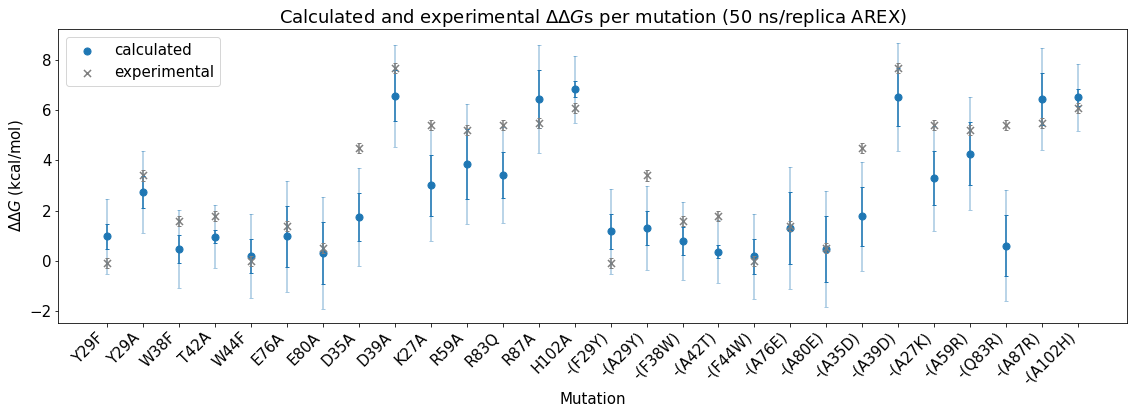

<Figure size 432x288 with 0 Axes>

In [8]:
# Set figure size
fig, axes = plt.subplots(nrows=1, ncols=1, sharex='col', figsize=(16, 6))

# Set font size
plt.rc('font', size=15) 

# Plot
mutations = [entry[0] for entry in to_plot]
to_plot_free_energies = [entry[1] for entry in to_plot]
to_plot_uncertainties = np.array([entry[2] for entry in to_plot])
plt.scatter(mutations, to_plot_free_energies, s=50, label='calculated')
plt.errorbar(mutations, to_plot_free_energies, yerr=to_plot_uncertainties, capsize=2, fmt='none')
plt.errorbar(mutations, to_plot_free_energies, yerr=to_plot_uncertainties + 1, alpha=0.4, capsize=2, fmt='none')
plt.scatter(mutations, experiment, s=50, marker='x', color='gray', label='experimental')
plt.errorbar(mutations, experiment, yerr=2*np.array([0.1]*28), color='gray', capsize=2, fmt='none')

# Set title
DDG = r"$\Delta\Delta G$"
plt.title(f"Calculated and experimental {DDG}s per mutation (50 ns/replica AREX)")

# Show legend
plt.legend()

# Set axis labels
plt.xlabel("Mutation")
plt.ylabel(r"$\Delta\Delta G$ (kcal/mol)")

# Set x ticks
plt.xticks(rotation=45, ha='right')

# Ensure x-axis labels are not cut off
plt.tight_layout()

# Save plot as pdf
main_dir = 47
save_path = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/calculated_vs_experiment_50ns.pdf"
plt.savefig(save_path, dpi=500)
plt.show()
plt.clf()